# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
import pandas as pd 
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# Load the train and test datasets from CSV files

def load_datasets(train_file_name,test_file_name):
    train_df = pd.read_csv(train_file_name)
    test_df = pd.read_csv(test_file_name)
    return train_df,test_df

In [3]:
# Split df into features:X , target:y 

def split_features_target(df,target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    return X,y

In [4]:
train_file_name = 'cancer_train.csv'
test_file_name = 'cancer_test.csv'
train_df , test_df = load_datasets(train_file_name,test_file_name)

In [5]:
# EDA 

# Dispaly the first 5 rows on the train set 

train_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [6]:
# Dispaly the first 5 rows on the test set 

test_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


In [7]:
# Checking if there is any missing data

train_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
test_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
# Checking if there is any duplicated data

train_df.duplicated().sum()

0

In [10]:
test_df.duplicated().sum()

0

In [11]:
# Checking the statistical measures

train_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.257910,19.482835,92.876220,668.580440,0.096224,0.105452,0.090853,0.050013,0.181970,0.062671,...,25.905626,108.558462,903.095165,0.132501,0.257053,0.276415,0.116064,0.290950,0.083924,0.608791
std,3.613344,4.261633,24.922646,364.587131,0.013793,0.053892,0.081118,0.039727,0.027895,0.006930,...,6.149887,34.615237,594.101449,0.022603,0.159287,0.208508,0.065882,0.061539,0.018236,0.488558
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.490000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.725000,16.390000,75.265000,422.300000,0.086210,0.065600,0.029700,0.020610,0.162000,0.057660,...,21.355000,84.405000,516.450000,0.116200,0.147750,0.115450,0.065280,0.251000,0.071250,0.000000
50%,13.460000,19.020000,87.160000,559.200000,0.095090,0.094530,0.063350,0.033340,0.179400,0.061400,...,25.500000,97.670000,697.700000,0.131200,0.216700,0.232200,0.101200,0.282200,0.079480,1.000000
75%,16.150000,21.960000,106.850000,807.450000,0.105000,0.130150,0.134150,0.077440,0.195950,0.066180,...,30.285000,127.750000,1151.500000,0.146400,0.341600,0.385300,0.161950,0.319600,0.092130,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.095750,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.577400,0.207500,1.000000


In [12]:
test_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,13.605965,18.518596,88.348246,600.243860,0.096905,0.099907,0.080602,0.044554,0.177938,0.063302,...,24.765614,102.083596,790.732456,0.131840,0.243136,0.255321,0.108786,0.286587,0.084034,0.701754
std,3.102470,4.389544,21.349267,291.016495,0.015151,0.048234,0.073645,0.034689,0.025262,0.007571,...,6.073141,28.770546,448.536271,0.023822,0.149455,0.209155,0.065094,0.063315,0.017423,0.459508
min,8.196000,9.710000,51.710000,201.900000,0.068280,0.023440,0.000000,0.000000,0.106000,0.051850,...,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210,0.000000
25%,11.472500,15.472500,74.425000,405.600000,0.086773,0.063600,0.027387,0.018790,0.161625,0.058833,...,20.245000,82.735000,511.000000,0.117750,0.142575,0.110050,0.059515,0.247275,0.072598,0.000000
50%,13.080000,18.060000,84.290000,517.250000,0.097810,0.085730,0.057550,0.034975,0.178100,0.062385,...,24.605000,96.675000,651.250000,0.131850,0.202300,0.193350,0.097305,0.281650,0.081545,1.000000
75%,14.957500,21.127500,96.645000,686.650000,0.106475,0.131450,0.112750,0.063698,0.195175,0.066047,...,28.630000,113.875000,902.025000,0.143900,0.308175,0.380150,0.156875,0.311200,0.091173,1.000000
max,23.290000,30.720000,158.900000,1685.000000,0.163400,0.283900,0.352300,0.162000,0.259700,0.097440,...,41.610000,179.100000,2215.000000,0.209800,0.866300,1.252000,0.273300,0.663800,0.173000,1.000000


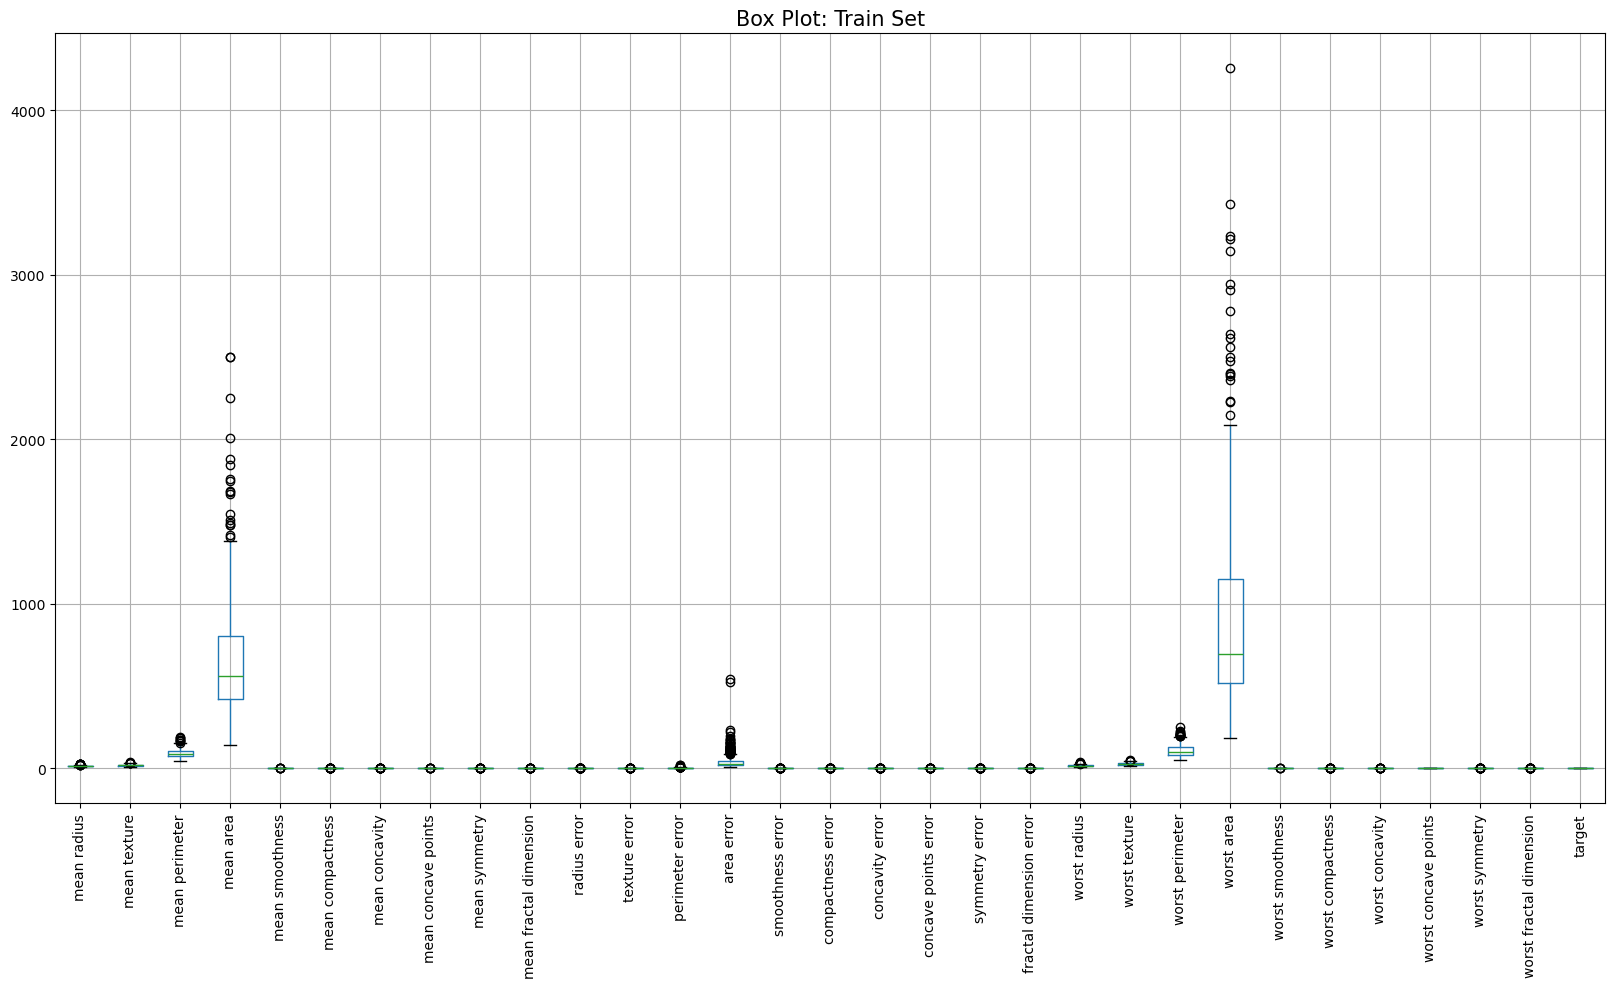

In [13]:
# Checking for outliers in the train set 

plt.figure(figsize=(20, 10))  
train_df.boxplot()
plt.xticks(rotation=90)  
plt.title('Box Plot: Train Set', fontsize=15)  
plt.show()

In [14]:
def remove_outliers_iqr(df):

    Q1 = df.quantile(0.25)  
    Q3 = df.quantile(0.75)  
    IQR = Q3 - Q1          
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_without_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

    return df_without_outliers

In [15]:
train_df_cleaned = remove_outliers_iqr(train_df)

In [16]:
print(f"The number of outliers has been removed {train_df.shape[0] - train_df_cleaned.shape[0]}")

The number of outliers has been removed 134


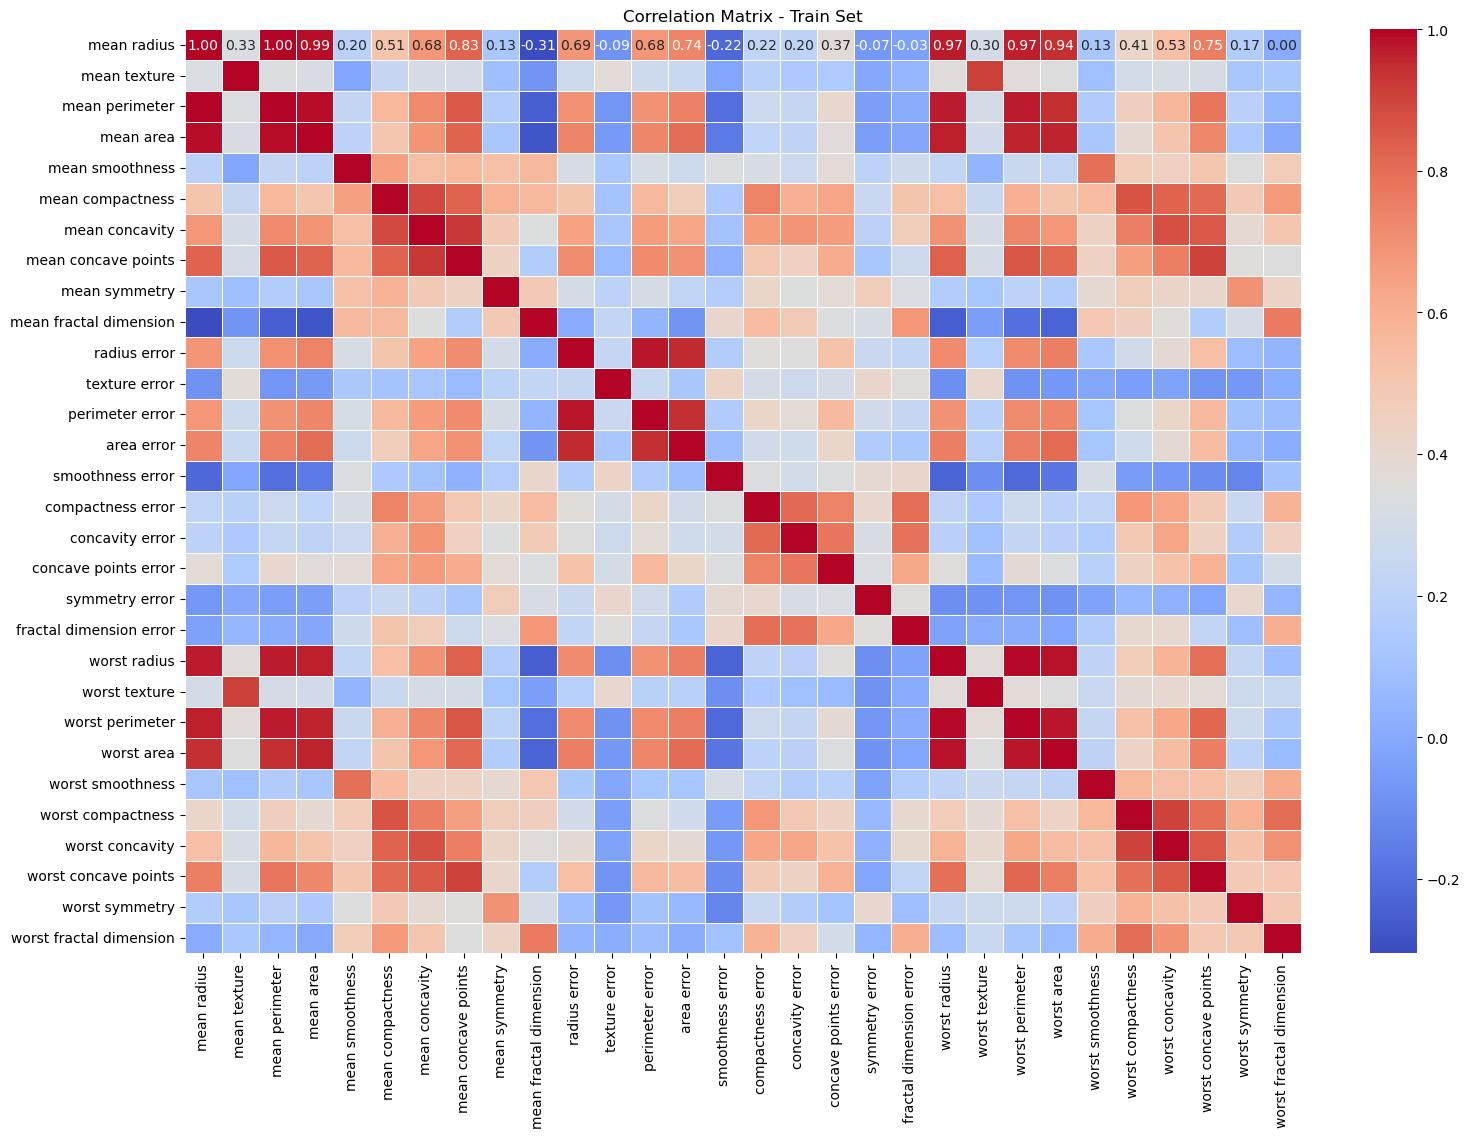

In [36]:
# Create a correlation matrix in order to create the Heatmap of correlations

correlation_matrix = train_df.drop(columns=['target']).corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True,fmt='.2f', linewidths=.5,)
plt.title('Correlation Matrix - Train Set')
plt.show()

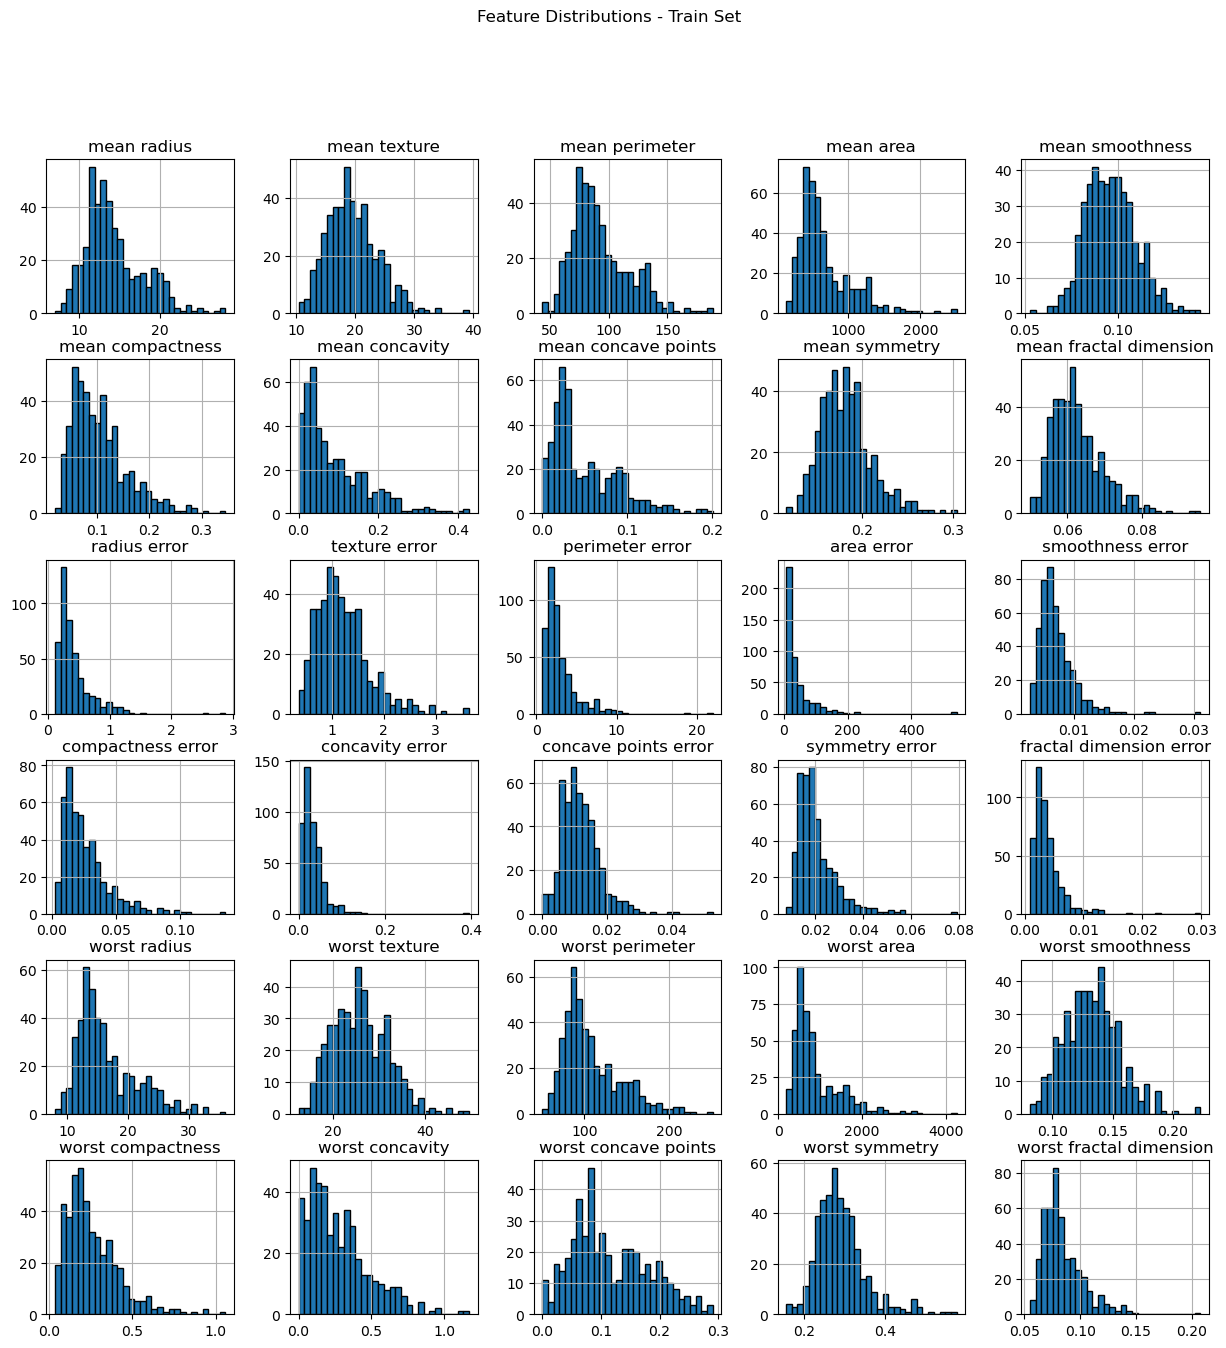

In [18]:
# Create a histogram of the features 

train_df.drop('target', axis=1).hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.suptitle('Feature Distributions - Train Set')
plt.show()

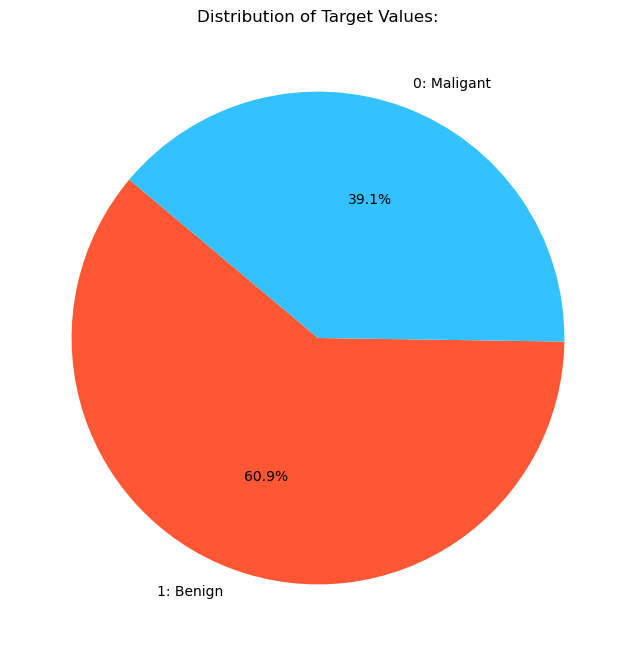

In [19]:
# Create a PIE graph in oreder to disply distribution of target values

targets = train_df['target']
targets = targets.replace({0:'0: Maligant',1:'1: Benign'})
target_counts = targets.value_counts()
plt.figure(figsize=(8, 8))
colors = ['#FF5733', '#33C1FF']  # Bright Red and Bright Blue
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Target Values:')
plt.show()

In [20]:
# Split each of the df into features:X , target:y 

X_train , y_train = split_features_target(train_df_cleaned,'target')
X_test , y_test = split_features_target(test_df,'target')

## Part 3 - Experiments
You could add as many code cells as needed

In [21]:
# Define the feature engineering methods

feature_engineering_methods = {
    
    'None':None,
    
    'Scaling': Pipeline([
          ('scaler' , StandardScaler())
    ]),

    'Feature Selection':Pipeline([
          ('feature_selection', SelectKBest(score_func=f_classif))
    ]),
    
    'Scaling + Feature Selection': Pipeline([
        ('scaler' , StandardScaler()),
        ('feature_selection', SelectKBest(score_func=f_classif))
    ]),  
}

In [22]:
# Define the models

models = {
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'SVM':SVC(),
    'RandomForest':RandomForestClassifier()
}

In [23]:
# Define the hyperparameters 

hyperparameters = {
    
    'KNN':{
        'model__n_neighbors':[2,3,5,7,9,11,13],
        'model__weights' : ['uniform' , 'distance'],
    },
    'DecisionTree':{
         'model__criterion': ['gini', 'entropy'],
         'model__max_depth': [10, 20, 30, 40, 50],
         'model__min_samples_split': [2, 5, 10],
         'model__min_samples_leaf': [1, 2, 4, 6],
    },
    'SVM':{
        'model__C': [0.1, 0.5,0.9,1,2,10],
        'model__class_weight':[None , 'balanced']
    },
    'RandomForest':{
        'model__n_estimators': [10,20,30,40,50],
        'model__max_depth': [10,20,30,40,50]
    },
    'Feature Selection': {
        'preprocessor__feature_selection__k': [3,5,7] 
    },
    'Scaling + Feature Selection': {
        'preprocessor__feature_selection__k': [3,5,7]  
    },
}


In [24]:
# The function constructs a machine learning pipeline that combines feature engineering and a model into a single coherent workflow

def create_pipeline(model,feature_engineering):
    if feature_engineering:
        return Pipeline([
            ('preprocessor', feature_engineering),
            ('model', model)
        ])
    else:
        return Pipeline([
            ('model', model)
        ])

In [25]:
pd.set_option('display.max_colwidth', None)  

In [26]:
# Tune hyperparameters and evaluate various models and feature engineering methods
# to find the best combination for maximizing the Macro Average F1 score

results = []

scoring_metric = make_scorer(f1_score, average='macro')

for feature_name, feature_eng in feature_engineering_methods.items():
    for model_name, model in models.items():
        pipeline = create_pipeline(model, feature_eng)
        param_grid = hyperparameters.get(model_name, {})

        if feature_name in hyperparameters:
            param_grid.update(hyperparameters.get(feature_name, {}))   
    
        grid = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring_metric)
        grid.fit(X_train, y_train)
        
        best_score = grid.best_score_
        best_params = grid.best_params_
        
        results.append({
            'Model': model_name,
            'Feature Engineering': feature_name,
            'Hyperparameters': best_params,
            'Macro Average F1': best_score,
        })
        
results_df = pd.DataFrame(results)

results_df


,Model,Feature Engineering,Hyperparameters,Macro Average F1
0,KNN,None,"{'model__n_neighbors': 7, 'model__weights': 'uniform'}",0.912458
1,DecisionTree,None,"{'model__criterion': 'gini', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}",0.918522
2,SVM,None,"{'model__C': 10, 'model__class_weight': None}",0.902376
3,RandomForest,None,"{'model__max_depth': 40, 'model__n_estimators': 20}",0.953382
4,KNN,Scaling,"{'model__n_neighbors': 3, 'model__weights': 'uniform'}",0.943182
5,DecisionTree,Scaling,"{'model__criterion': 'gini', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}",0.913390
6,SVM,Scaling,"{'model__C': 1, 'model__class_weight': None}",0.964222
7,RandomForest,Scaling,"{'model__max_depth': 20, 'model__n_estimators': 20}",0.945199
8,KNN,Feature Selection,"{'model__n_neighbors': 5, 'model__weights': 'distance', 'preprocessor__feature_selection__k': 7}",0.905095
9,DecisionTree,Feature Selection,"{'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'preprocessor__feature_selection__k': 5}",0.911801


In [27]:
best_result = results_df.loc[results_df['Macro Average F1'].idxmax()]
print(best_result)

Model                                                           SVM
Feature Engineering                                         Scaling
Hyperparameters        {'model__C': 1, 'model__class_weight': None}
Macro Average F1                                           0.964222
Name: 6, dtype: object


In [28]:
# Extract the best combination 

best_model = best_result['Model']
best_feature_engineering = best_result['Feature Engineering']
best_hyperparameters = best_result['Hyperparameters']

In [29]:
print(best_model)
print(best_feature_engineering)
print(best_hyperparameters)

SVM
Scaling
{'model__C': 1, 'model__class_weight': None}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [30]:
pipeline = create_pipeline(models[best_model], feature_engineering_methods[best_feature_engineering])
pipeline.set_params(**best_hyperparameters)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('model', SVC(C=1))])

## Part 5 - Apply on test and show model performance estimation

In [31]:
# Predicts labels for the test set using the trained pipeline and 
# creates a DataFrame showing the true and predicted labels for the first five samples

y_pred = pipeline.predict(X_test)

results = pd.DataFrame({
    'True Label': y_test.head(5).values,
    'Predicted Label': y_pred[:5]
})

results


,True Label,Predicted Label
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [32]:
# Create a confusion matrix 

cm = confusion_matrix(y_test, y_pred)

confusion_matrix_df = pd.DataFrame(cm, 
                                   index=['True Benign', 'True Malignant'], 
                                   columns=['Predicted Benign', 'Predicted Malignant'])
confusion_matrix_df

,Predicted Benign,Predicted Malignant
True Benign,34,0
True Malignant,5,75


In [33]:
# Evaluate the model rate by the metrics of classification 

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred,)
recall = recall_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')

model_eveluation_df = pd.DataFrame({
    'Metric': ['Macro Average F1','Accuracy', 'Error Rate', 'Precision', 'Recall', ],
    'Score': [f1_macro,accuracy, error_rate, precision, recall,]
})

model_eveluation_df = model_eveluation_df.style.apply(lambda x: ['background-color: yellow' if x.name == 0 else '' for _ in x], axis=1)

model_eveluation_df


,Metric,Score
0,Macro Average F1,0.949624
1,Accuracy,0.956140
2,Error Rate,0.043860
3,Precision,1.000000
4,Recall,0.937500
